In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_excel('files_for_lab/excel_files/marketing_customer_analysis.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


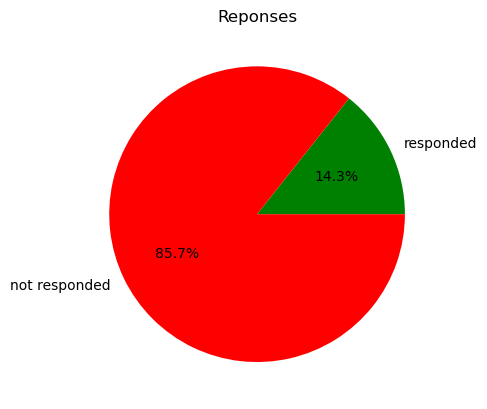

In [5]:
# Show a plot of the total number of responses.

import matplotlib.pyplot as plt
import numpy as np

number_of_response    = len(df[df['Response']=='Yes'])
number_of_no_response = len(df) - number_of_response

x = [number_of_response, number_of_no_response]
labels = ['responded', 'not responded']
colors = ['green', 'red']

fig, ax = plt.subplots()
ax.pie(x, colors=colors, labels=labels, autopct='%.1f%%')
ax.set_title('Reponses')

plt.show()

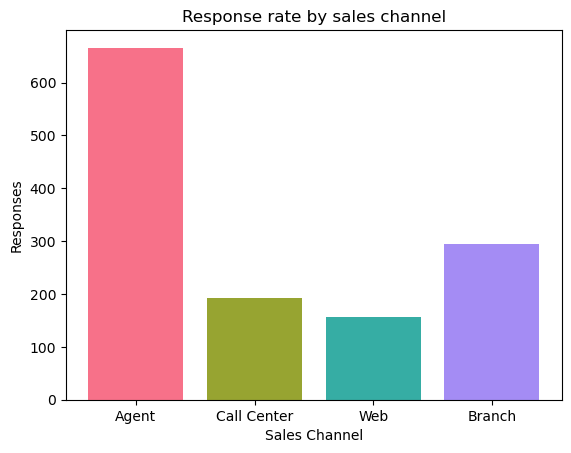

In [6]:
# Show a plot of the response rate by the sales channel.
import seaborn as sns
hist_data = {}

for x in list(df['Sales Channel'].unique()):
    hist_data[x] = len(df[(df['Response']=='Yes') & (df['Sales Channel']==x) ])

ind = np.arange(len(hist_data))
palette = sns.color_palette("husl", len(hist_data))

plt.bar(ind, list(hist_data.values()), color=palette)
plt.xticks(ind, list(hist_data.keys()))
plt.title("Response rate by sales channel")
plt.ylabel("Responses")
plt.xlabel("Sales Channel")
plt.show()


<AxesSubplot:xlabel='Response', ylabel='Total Claim Amount'>

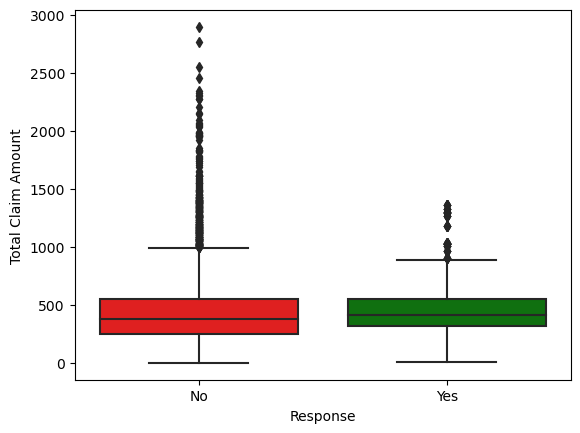

In [7]:
# Show a plot of the response rate by the total claim amount.

palette = {"No": "red", "Yes": "green"}
sns.boxplot(df, y="Total Claim Amount", x="Response", palette=palette)


<AxesSubplot:xlabel='Response', ylabel='Income'>

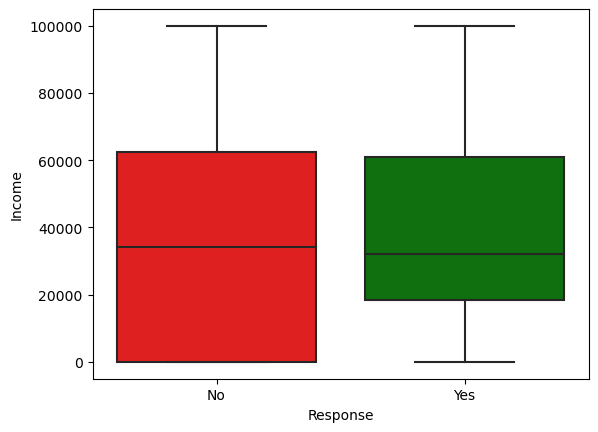

In [8]:
# Show a plot of the response rate by income.


palette = {"No": "red", "Yes": "green"}
sns.boxplot(df, y="Income", x="Response", palette=palette)


In [9]:

# Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical
# columns in a dataframe called `categoricals`. (You can use np.number and np.object to select the numerical
# data types and categorical data types respectively)

numerical = df.select_dtypes(np.number)
categorical = df.select_dtypes(object)

display(numerical.head())
display(categorical.head())


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


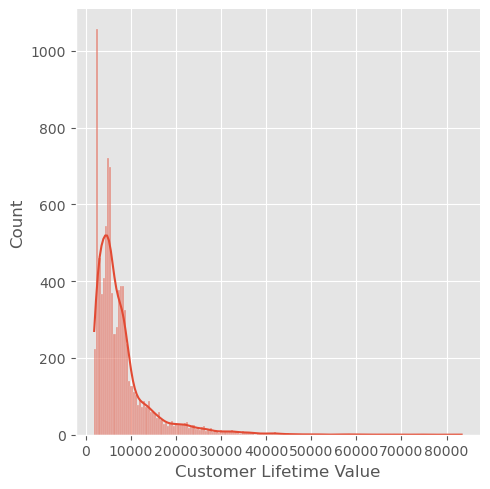

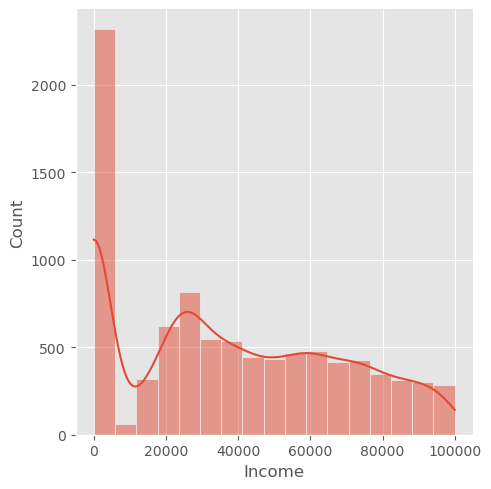

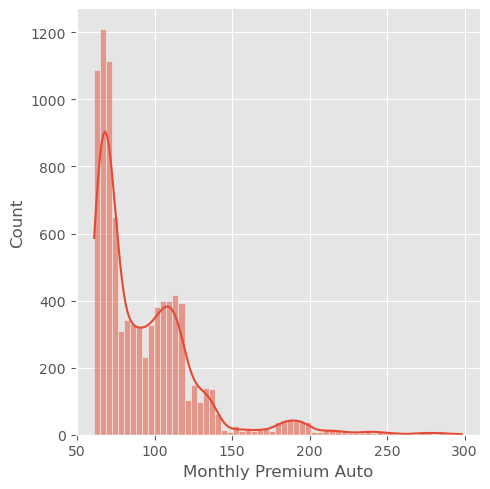

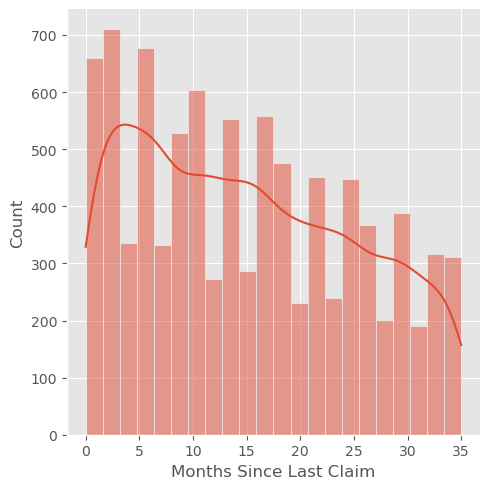

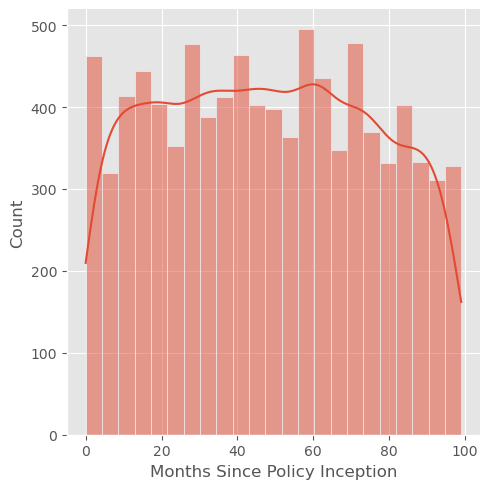

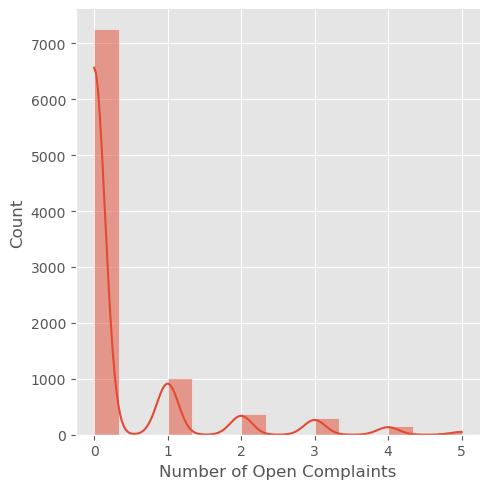

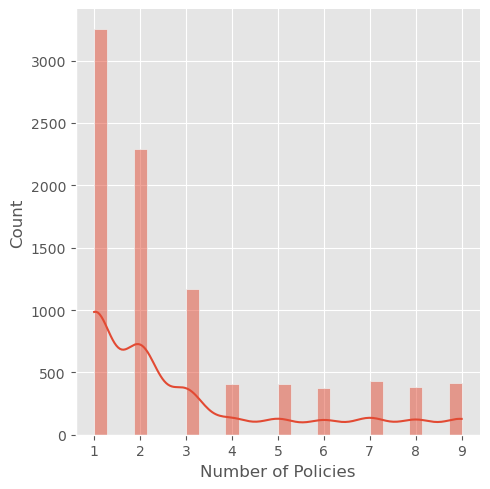

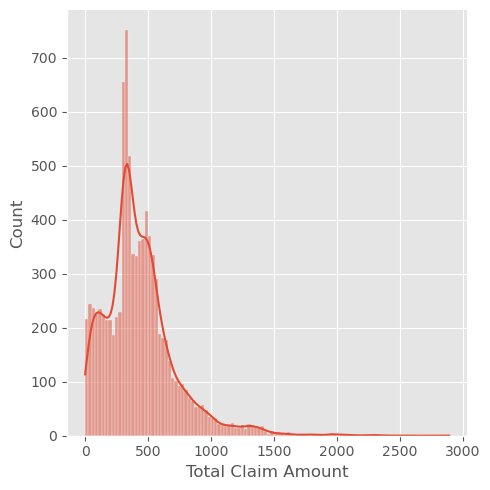

In [15]:
# Now we will try to check the normality of the numerical variables visually
#  - Use seaborn library to construct distribution plots for the numerical variables
#  - Use Matplotlib to construct histograms
#  - Do the distributions for different numerical variables look like a normal distribution 

#fig, ax = plt.subplots(2, 1)
for column_name in numerical.columns:
    sns.displot(numerical[column_name], kde=True)

#sns.displot(numerical, x='Customer Lifetime Value', kde=True)
#sns.displot(numerical, x='Monthly Premium Auto', kde=True)
#sns.displot(numerical, x='Months Since Last Claim', kde=True)
#sns.displot(numerical, x='Months Since Policy Inception', kde=True)

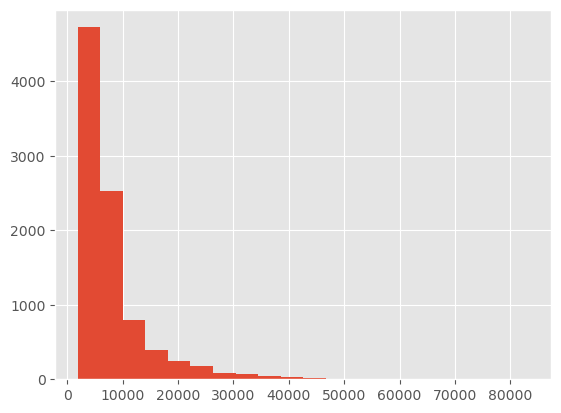

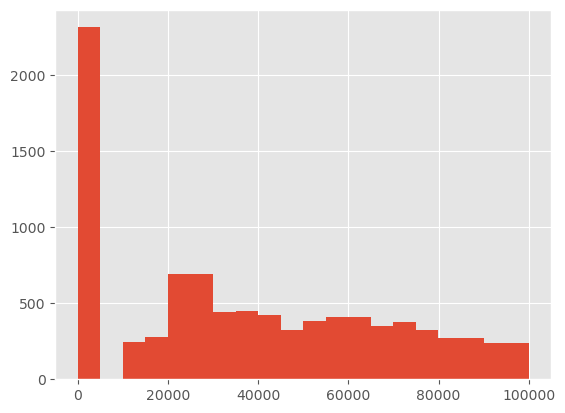

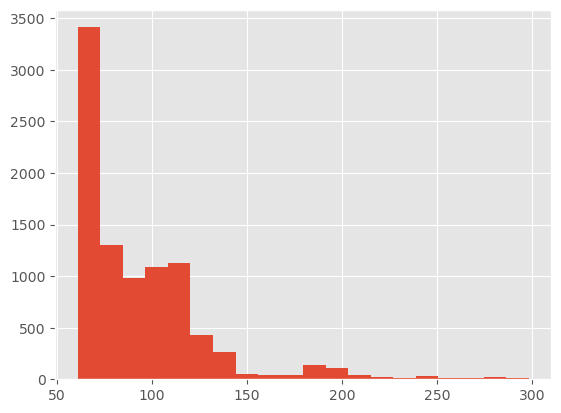

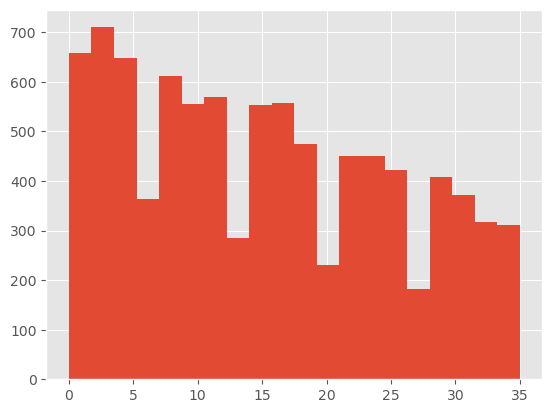

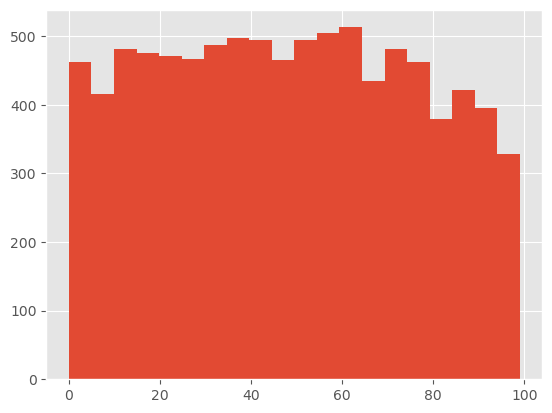

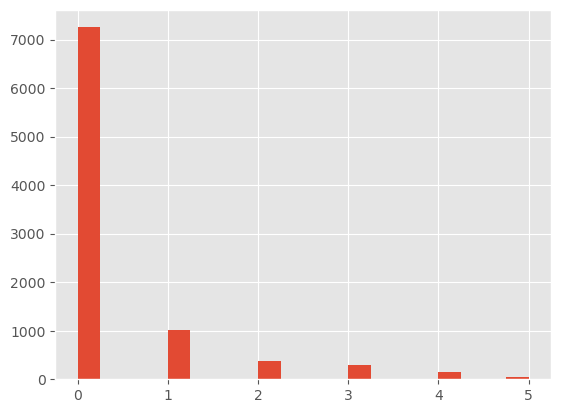

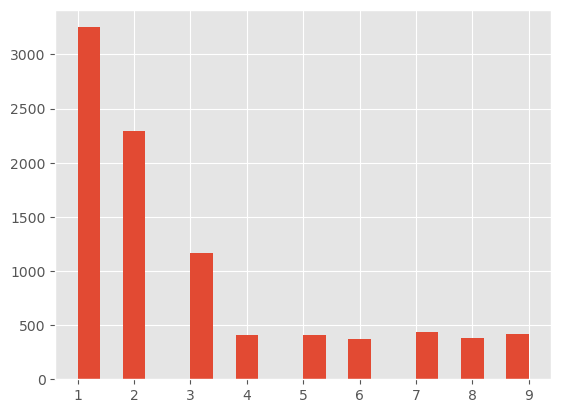

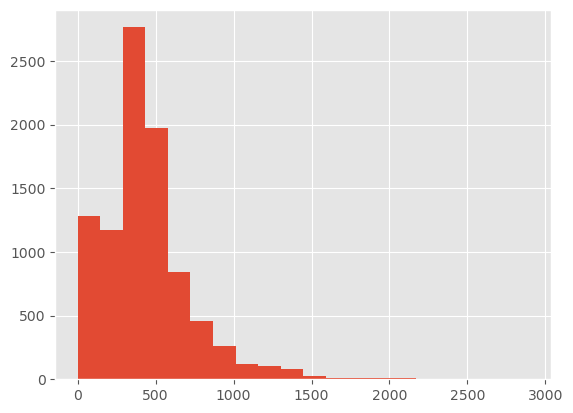

In [11]:

plt.style.use('ggplot')

for column_name in numerical.columns:
    plt.hist(numerical[column_name], bins=20)
    plt.show()
#    sns.displot(numerical, x=column_name, kde=True)

In [12]:
# For the numerical variables, check the multicollinearity between the features.
# Please note that we will use the column `total_claim_amount` later as the target variable. 
numerical.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<AxesSubplot:>

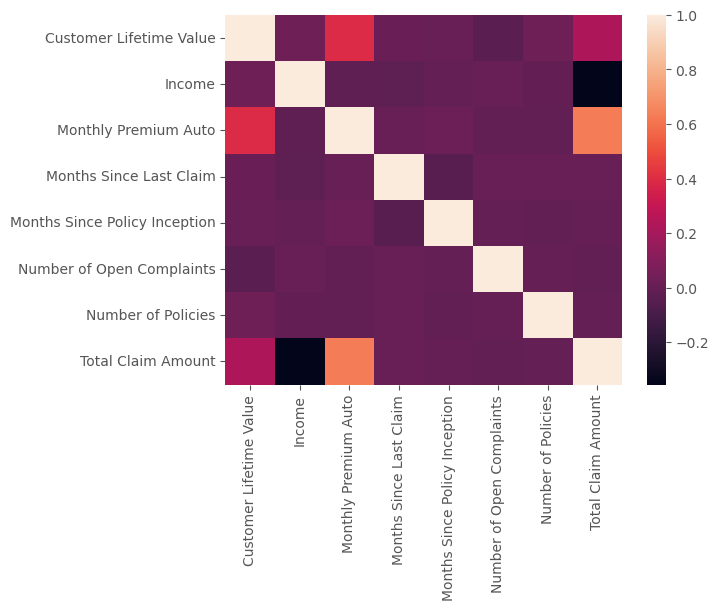

In [13]:
sns.heatmap(numerical.corr())

In [14]:
# Drop one of the two features that show a high correlation between them (greater than 0.9).
# Write code for both the correlation matrix and for seaborn heatmap.
# If there is no pair of features that have a high correlation, then do not drop any features


So I don't know if I did well, but there are no features with high correlation